# Preparation

In [3]:
#loading files
excelFile1 = r'user_item_pair_train_ZP.xlsx'
excelFile2 = r'user_item_pair_train_XCQ.xlsx'
excelFile3 = r'user_item_pair_test_ZP.xlsx'
excelFile4 = r'user_item_pair_test_XCQ.xlsx'
df1 = pd.DataFrame(pd.read_excel(excelFile1))
df2 = pd.DataFrame(pd.read_excel(excelFile2))
df3 = pd.DataFrame(pd.read_excel(excelFile3))
df4 = pd.DataFrame(pd.read_excel(excelFile4))

In [ ]:
df2 = df2.drop(columns=['label','user_id','item_id','time','id'])
df4 = df4.drop(columns=['label','user_id','item_id','time','id'])

In [5]:
train = pd.merge(df1,df2,left_index=True,right_index=True,how='outer')
test = pd.merge(df3,df4,left_index=True,right_index=True,how='outer')

In [6]:
train = train.dropna(how='all')
test = train.dropna(how='all')

In [25]:
train = shuffle(train)  
test = shuffle(test)

In [26]:
train.head()

,label,1_user activity,1_number of items related,1_number of browsing actions,1_number of collecting actions,1_number of carting actions,1_number of buying actions,1_behavior pattern,1_ratio of browsing actions,1_ratio of collecting actions,...,2_item_buypeople_collectpeople,2_item_buypeople_addpeople,2_item_frequentbuypeople_buypeople,2_item_frequentviewpeople_viewpeople,2_item_frequentcollectpeople_collectpeople,2_item_frequentaddpeople_addpeople,4_geo_purchasepower,4_geo_buyview,4_geo_buycollect,4_geo_buyadd
209370,0,463,205,412,1,48,2,0,0.889849,0.002160,...,0.0,0.0,0.0,1.0,0.0,0.0,0.012048,0.012632,0.012632,0.545455
59418,0,377,162,372,4,0,1,0,0.986737,0.010610,...,0.0,0.0,0.0,1.0,0.0,0.0,0.010547,0.011205,0.011205,0.383741
152281,0,319,131,279,2,33,5,0,0.874608,0.006270,...,0.0,0.0,0.0,1.0,0.0,0.0,0.010547,0.011205,0.011205,0.383741
272911,0,325,110,309,7,6,3,0,0.950769,0.021538,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000666,0.000690,0.000690,0.125000
9058,0,423,177,386,9,27,1,0,0.912530,0.021277,...,0.0,0.0,0.0,1.0,0.0,0.0,0.019197,0.020860,0.020860,0.347368


In [27]:
test.head()

,label,1_user activity,1_number of items related,1_number of browsing actions,1_number of collecting actions,1_number of carting actions,1_number of buying actions,1_behavior pattern,1_ratio of browsing actions,1_ratio of collecting actions,...,2_item_buypeople_collectpeople,2_item_buypeople_addpeople,2_item_frequentbuypeople_buypeople,2_item_frequentviewpeople_viewpeople,2_item_frequentcollectpeople_collectpeople,2_item_frequentaddpeople_addpeople,4_geo_purchasepower,4_geo_buyview,4_geo_buycollect,4_geo_buyadd
8284,0,113,62,112,0,1,0,-1,0.991150,0.000000,...,0.0,0.0,0.0,0.666667,0.0,0.333333,0.000000,0.000000,0.000000,0.000000
164685,0,486,168,427,58,1,0,-1,0.878601,0.119342,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.026071,0.028542,0.028542,0.509091
28706,0,530,139,471,31,9,19,0,0.888679,0.058491,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.010547,0.011205,0.011205,0.383741
220468,0,813,230,720,88,2,3,0,0.885609,0.108241,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.003749,0.003876,0.003876,0.222222
54456,0,114,45,95,17,2,0,-1,0.833333,0.149123,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.010547,0.011205,0.011205,0.383741


In [ ]:
train = train.drop(columns=['user_id','item_id','time'])
test = test.drop(columns=['user_id','item_id','time'])

In [30]:
#standardization
y_train = train.label
X_train = train.drop(columns=['label'])
y_test = test.label
X_test = test.drop(columns=['label'])
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [31]:
#over&down sampling
data1 = train[train['label'] == 1]  # minority (buy) in data1
data0 = train[train['label'] == 0]  # majority (not buy) in data0
oversample = data1.sample(frac=6, replace=True)
downsample = data0.sample(frac=0.3, replace=True)
sample = oversample.append(downsample)
X_train=sample.drop(columns=['label'])
y_train=sample.label

# Lasso regression

# Gradient Search Part (to be run afterwards)
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = {'penalty': ['l1'],
              'C': C_range}
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=1),
                 param_grid=param_grid,
                 scoring='accuracy', 
                 refit=True,
                 cv=10,
                 n_jobs=-1)
gs_lr = gs_lr.fit(X, y)
print(gs_lr.best_score_)
print(gs_lr.best_params_)

In [32]:
lr = LogisticRegression(penalty='l1',C=0.0000085)
lr = lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
lr.coef_[lr.coef_!=0].shape # check the number of the features with non-zero weights

Training accuracy: 0.9008998304041135
Test accuracy: 0.5794007691619713


(5,)

In [33]:
print('most important features:',X_train.columns[np.where(lr.coef_[0]!=0),])

most important features: Index([['1_user activity', '1_number of items related', '1_first time online', '1_time lag', '2_item_view']], dtype='object')


In [34]:
#PCA+LR
#the function below is to plot the explained variance of pca
def plt_pca(X):   
    cov_mat = np.cov(X.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    tot = sum(eigen_vals)
    var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize = (10, 8), dpi = 300)
    plt.bar(range(1, 1+len(var_exp)), var_exp, alpha=0.6, align='center',label='explained variance')
    plt.step(range(1, 1+len(var_exp)), cum_var_exp, where='mid',label='cumulative variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component number')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title('Explained variance of pca')

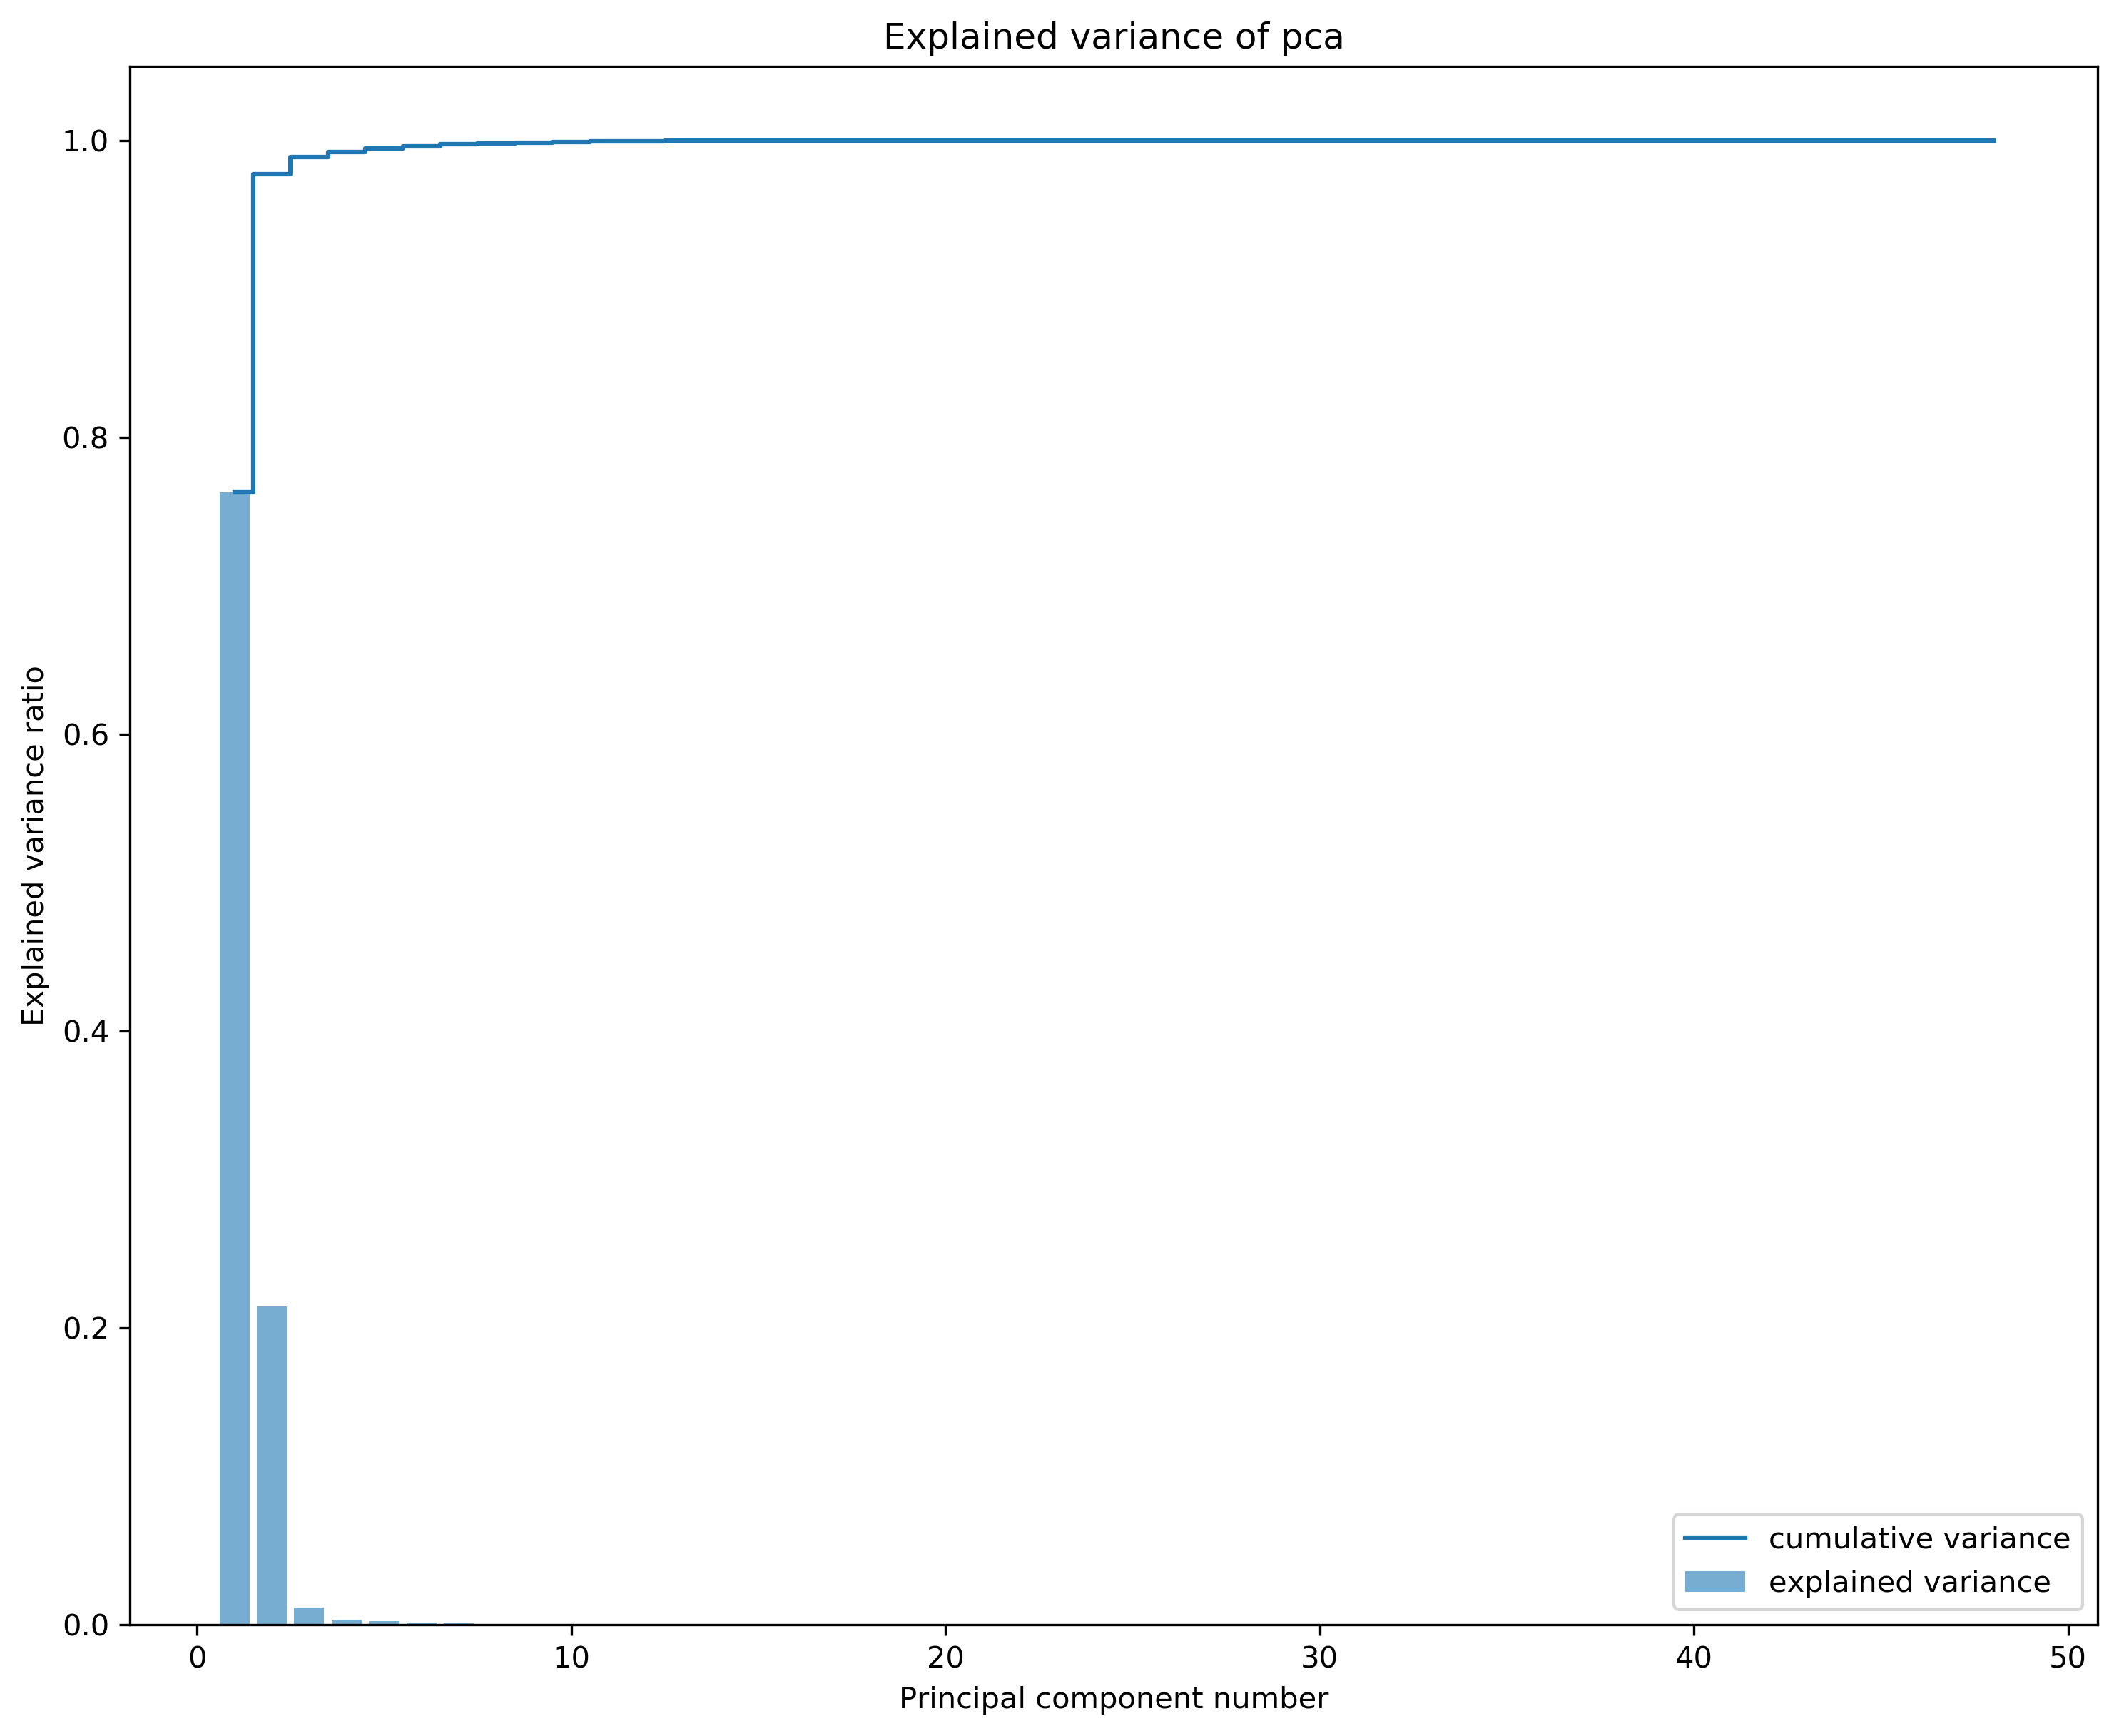

In [35]:
plt_pca(X_train)

In [53]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("PCA components:\n{}".format(pca.components_))

X_train_pca.shape: (92573, 2)
PCA components:
[[ 7.04538352e-01  2.66249807e-01  6.38963765e-01  3.05805421e-02
   2.68862777e-02  8.10776700e-03  6.24018491e-05 -1.46380752e-05
   1.18642028e-05  3.88813027e-06 -1.11425787e-06  4.87080849e-03
   2.92016737e-04 -5.35555688e-06  5.02967202e-03 -4.25255540e-03
   9.28222742e-03 -2.58594805e-04  4.18732822e-02  1.81867635e-03
   4.61266811e-02  1.39456426e-05  4.49340396e-04 -6.30358999e-05
   2.65242671e-06  1.00589701e-02  1.82495098e-03  1.36097950e-01
   4.39593835e-03  7.33463184e-03  6.94732612e-07 -1.07981162e-04
   9.50430136e-06  4.86825603e-05  5.59177653e-06  1.20404998e-05
   1.33787540e-05  1.76715299e-05  7.94854401e-07 -1.08193203e-06
   5.61034114e-07 -6.92481923e-06  3.80822995e-06  2.55555517e-06
   2.57158043e-07  2.77074298e-07  2.77074298e-07 -1.28453203e-05]
 [-9.23873575e-02 -4.81996206e-02 -8.75742654e-02  2.68104746e-03
  -5.96411011e-03 -1.53002943e-03 -1.85408988e-05 -1.05085025e-06
  -1.32002178e-06 -2.62566017

In [59]:
feature_names = X_train.columns.values

Text(0, 0.5, 'principal components')

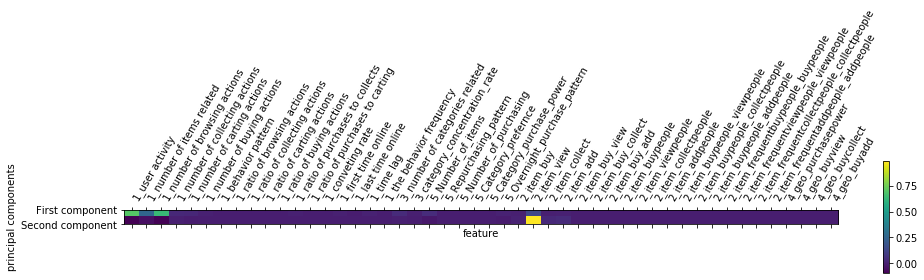

In [62]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("principal components")

In [64]:
pipe_lr = make_pipeline(pca,LogisticRegression(random_state=1))
pipe_lr = pipe_lr.fit(X_train, y_train)
print('Training accuracy:', pipe_lr.score(X_train, y_train))
print('Test Accuracy:', pipe_lr.score(X_test, y_test))

Training accuracy: 0.9008998304041135
Test Accuracy: 0.9945300062606207


# Gradient Search Part (to be run afterwards)
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = {'penalty': ['l2'],
              'C': C_range,
              'solver': ['lbfgs']}
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=1),
                 param_grid=param_grid,
                 scoring='accuracy', 
                 refit=True,
                 cv=10,
                 n_jobs=-1)
gs_lr = gs_lr.fit(X_train_pca, y_train)
print(gs_lr.best_score_)
print(gs_lr.best_params_)
## SVM (to be run afterwards)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs_svc = gs_svc.fit(X_train, y_train)
print(gs_svc.best_score_)
print(gs_svc.best_params_)

In [90]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.001, C=10.0)
svm.fit(X_train, y_train)
print('Training accuracy:', svm.score(X_train, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.9837965713544986
Test accuracy: 0.9945300062606207


In [66]:
rfc = RandomForestClassifier(n_estimators=100)
rfc = rfc.fit(X_train,y_train)
print('Training accuracy:', rfc.score(X_train, y_train))
print('Test Accuracy:', rfc.score(X_test, y_test))

Training accuracy: 0.9942207771164379
Test Accuracy: 0.9913496109471425


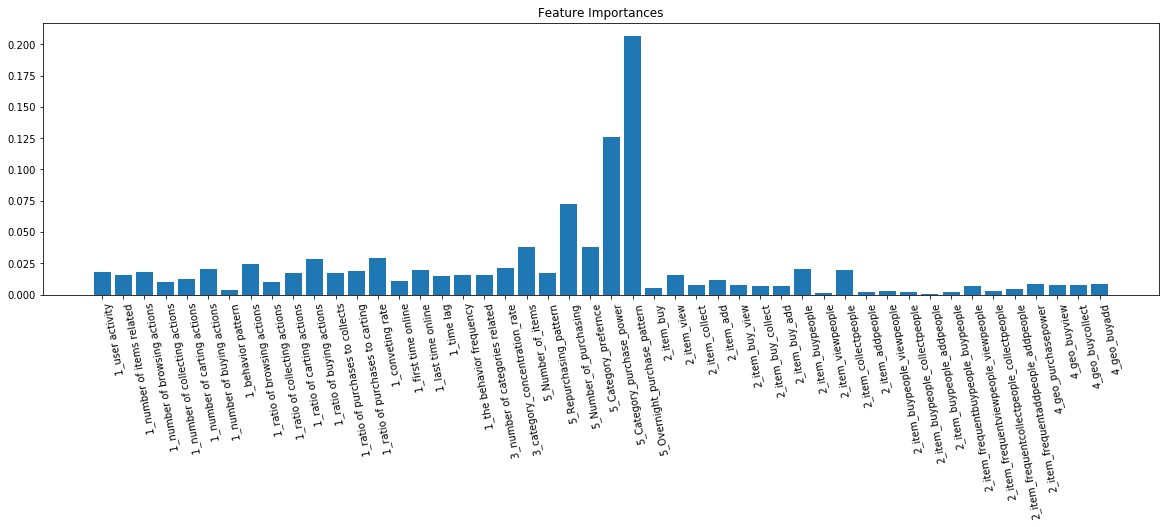

In [78]:
f, ax = plt.subplots(figsize=(20, 5))
ax.bar(range(len(rfc.feature_importances_)),rfc.feature_importances_)
plt.xticks(range(len(feature_names)),feature_names, rotation=100, ha='left')
ax.set_title("Feature Importances")
f.show()

In [80]:
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)
print('Training accuracy:', gbc.score(X_train, y_train))
print('Test Accuracy:', gbc.score(X_test, y_test))

Training accuracy: 0.9634666695472762
Test Accuracy: 0.9817332975583579


# Validation

In [86]:
# F-1 score for Lasso+LR
y_train_pred1 = cross_val_predict(lr, X_train, y_train, cv=5)
f1 = f1_score(y_train, y_train_pred1)
print("F1 Score: {0:.2%}".format(f1))

F1 Score: 0.00%


In [87]:
# F-1 score for pca+LR
y_train_pred2 = cross_val_predict(pipe_lr, X_train, y_train, cv=5)
f2 = f1_score(y_train, y_train_pred2)
print("F1 Score: {0:.2%}".format(f2))

F1 Score: 0.00%


In [ ]:
# F-1 score for SVM
y_train_pred3 = cross_val_predict(svc, X_train, y_train, cv=5)
f5 = f1_score(y_train, y_train_pred5)
print("F1 Score: {0:.2%}".format(f5))

In [88]:
# F-1 score for RF
y_train_pred3 = cross_val_predict(rfc, X_train, y_train, cv=5)
f3 = f1_score(y_train, y_train_pred3)
print("F1 Score: {0:.2%}".format(f3))

F1 Score: 95.28%


In [84]:
# F-1 score for GBC
y_train_pred4 = cross_val_predict(gbc, X_train, y_train, cv=5)
f4 = f1_score(y_train, y_train_pred4)
print("F1 Score: {0:.2%}".format(f4))

F1 Score: 80.63%


<Figure size 3000x1800 with 0 Axes>

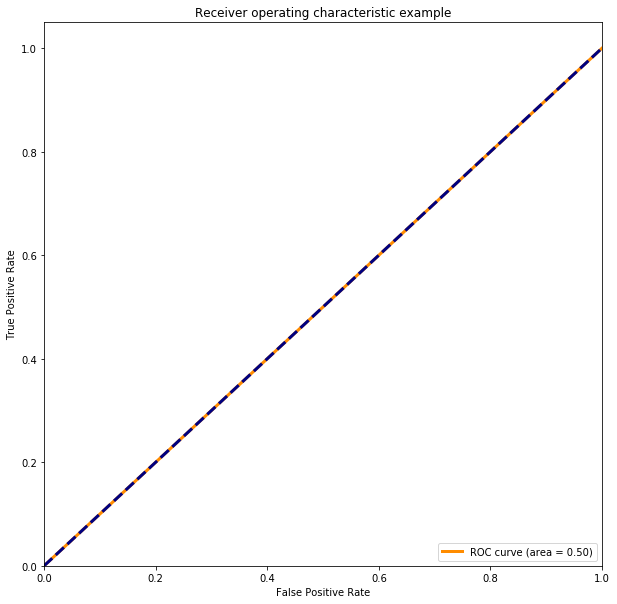

<Figure size 3000x1800 with 0 Axes>

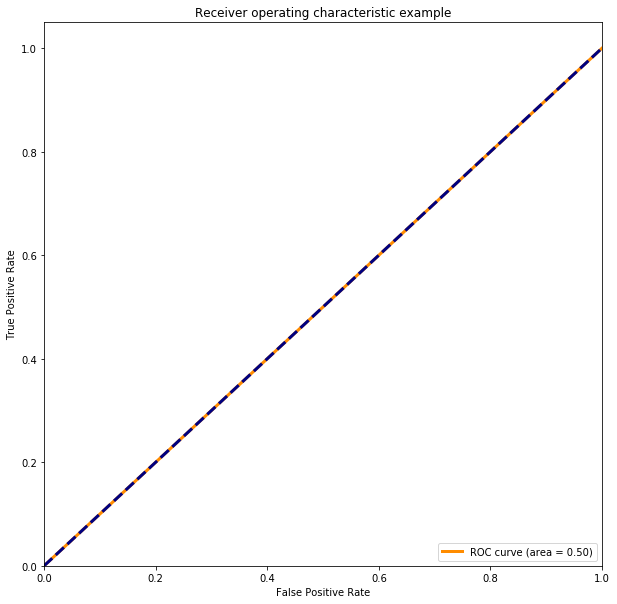

<Figure size 3000x1800 with 0 Axes>

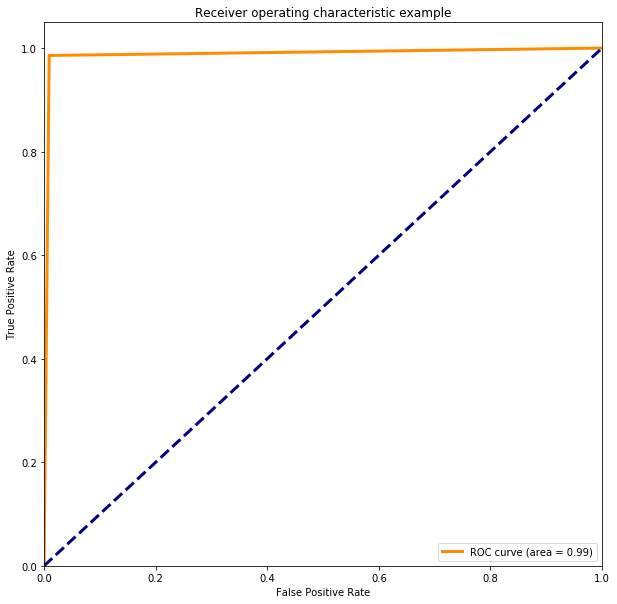

<Figure size 3000x1800 with 0 Axes>

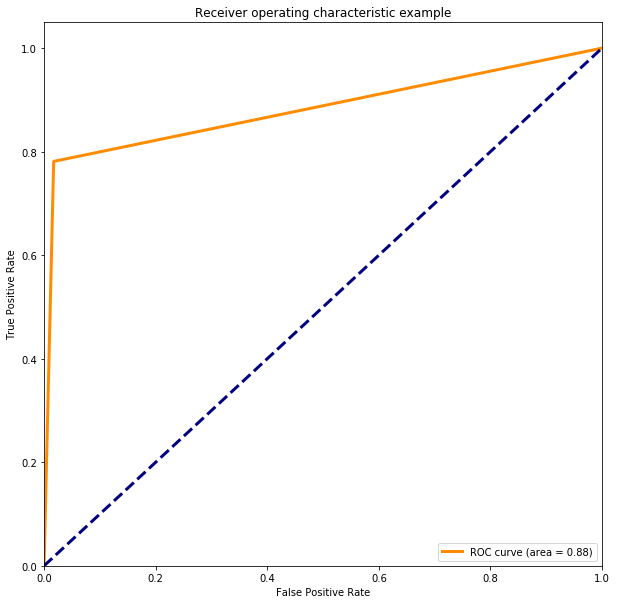

In [89]:
# plot ROC curve
def plt_ROC(y,Y):
    fpr, tpr, threshold = roc_curve(y, Y)  # get TPR and FPR
    roc_auc = auc(fpr, tpr) 

    plt.figure(figsize = (10, 6), dpi = 300)
    lw = 3
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, color='darkorange',
             lw = lw, label='ROC curve (area = %0.2f)' % roc_auc)  # FPR as x，TPR as y
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
plt_ROC(y_train, y_train_pred1)
plt.savefig('ROC for Lasso+LR.jpg', dpi = 300)
plt.show()
plt_ROC(y_train, y_train_pred2)
plt.savefig('ROC for PCA+LR.jpg', dpi = 300)
plt.show()
plt_ROC(y_train, y_train_pred3)
plt.savefig('ROC for RF.jpg', dpi = 300)
plt.show()
plt_ROC(y_train, y_train_pred4)
plt.savefig('ROC for GBC.jpg', dpi = 300)
plt.show()
plt_ROC(y_train, y_train_pred5)
plt.savefig('ROC for SVM.jpg', dpi = 300)
plt.show()